# Preparación

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Regresión lineal

Lo que vamos a ver es como se realiza "a mano" el entrenamiento de un modelo lineal. En realidad el problema se reduce a minimizar el error de las ecuaciones probando diversos parámetros.

## La ecuación normal

Esta es la ecuación normal que permite obtener el valor $\hat\theta$ que minimiza el coste la misma.  
$\hat{\theta} = (X^{T}X)^{-1}Xy$

In [2]:
# Vamos a generar algunos datos con apariencia lineal para probar la función
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

Saving figure generated_data_plot


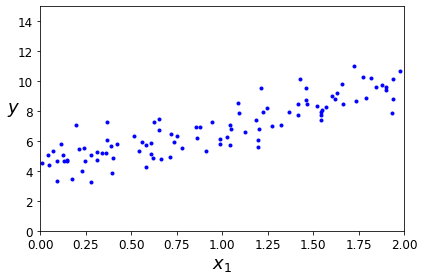

In [3]:
# Representamos en la distribución
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

Antes de calcular la ecuación normal hay que incluir en el vector X una columna de unos que representa el término independiente (*bias*)

In [ ]:
2*6

In [4]:
X_b = np.c_[np.ones((100,1)),X]

In [5]:
# Ahora hacemos el cálculo de la ecuación normal propiamente dicha
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

Si recordamos como hemos formado los valores


```
y = 4 + 3 * X + np.random.randn(100,1)
```

Deberíamos haber obtenido los valores $\theta_0=4$ y $\theta_1=3$, en su lugar hemos obtenido  $\theta_0=4.2150961$ y $\theta_1=2.77011339$ que están bastante cerca de los valores correctos pero que no son iguales, debido al ruido introducido por:


```
np.random.randn(100,1)
```

Con esta ecuación podemos hacer predicciones





In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new, X_new_b

(array([[0],
        [2]]),
 array([[1., 0.],
        [1., 2.]]))

In [7]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Saving figure linear_model_predictions_plot


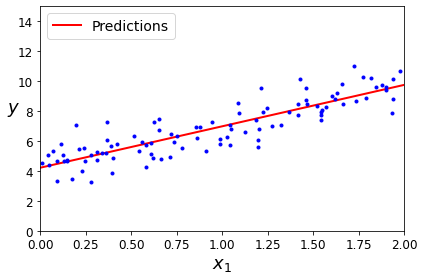

In [8]:
# Pintamos la recta obtenida por theta_best y la distribución de puntos original
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

## Complejidad computacional
Conforme el número de atributos aumenta la complejidad computacional lo hace también y en ocasiones de manera expectacular.
Por eso en ocasiones se utilizan otras maneras de entrenar para la regresión lineal, como veremos en el siguiente capítulo.

# Descenso del gradiente

La base del descenso del gradiente es el estudio de la pendiente un punto aleatorio de la función de coste, tratamos de hallar el mínimo de esa función calculando tras un pequeño aumento o desceso de los valores de $\theta$ el nuevo  valor de  la pendiente, cuando sea cero habremos llegado al mínimio. El  tamaño de ese pequeño paso se llama tasa o ritmo de aprendizaje (*learning rate*).  
Hay varias consideraciones a tener en cuenta cuando se hace uso de este método. La primera es elegir una tasa de apredizaje del tamaño adecuado y la segunda es que los atributos estén normalizados.  
Si las tasa es muy pequeña o los atributos no están normalizados podemos tardar mucho en encontrar el mínimo, si es que lo hacemos. Si la tasa es demasiado grande corremos el peligro de ir saltando por la fución sin llegar el mínimo buscado.

### Descenso del gradiente en lote

Sabemos que la pendiente de una función en un punto viene dada por la derivada parcial para la función en ese punto, luego variando los coeficentes y calculando la derivada en ese punto de la función de coste nos podemos aproximar progresivamente al pendiente cero que indicará su mínimo.  
Podemos ir calculando una a una esas derivadas parciales una a una  
$\frac{d}{d\theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m}(\theta^{T} x^{i} - y^{i}) x_j^{i}$   
O hacerlo de golpe con la calculando el vector de gradiente  
$\triangledown MSE(\theta) = \frac{2}{m} X^T(X^\theta-y)$  
En este caso de cáculo de golpe (en lote) usamos resoluciones matriciales como hacíamos con la equación normal más arriba.


In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
  theta = theta - eta * gradients

In [10]:
theta

array([[4.21509616],
       [2.77011339]])

Como vemos llegamos a un resultado similar al de la ecuación normal

### Descenso del gradiente estocástico

El problema que tiene la variente en lote es que en cada iteración hace uso de todo el conjunto de los datos de entrenamiento. Si en lugar de eso lo que hacemos en cada paso es elegir aleatoriamente un valor del conjunto de entrenamiento el algoritmo irá más rápido.

In [11]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.18475289],
       [2.73036719]])

Tenemos el estimador [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) que hace uso del gradiente estocástico

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.22609703]), array([2.79227913]))

### Descenso del gradiente en minilote

Como su nombre hace sospechar es un compromiso entre los dos anteriores. Por un lado no usa todo el conjunto de entrenamiento en cada pasa, sino un pequeño subconjunto (minilote) en lugar de un solo elemento como hacía el estocástico.

# Regresión polinominal
Hasta ahora hemos visto la regresión calculada como la ecuación que proporciona una recta que se ajusta a los valores. Pero puede darse el caso de que la recta no sea representativa de los datos que queremos aproximar.

In [15]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [16]:
# Imaginemos que nuestros datos se adaptan aproximadamente a una curva
m = 100
X = 6 * np.random.rand(m, 1) - 3 # De esta manera nos aseguramos que estos números aleatorios están entre -3 y 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


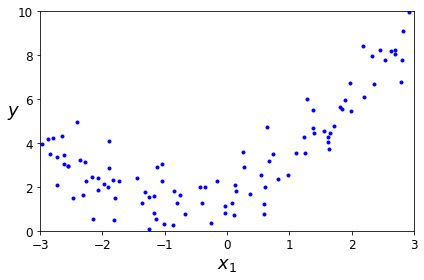

In [17]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

Es evidente que una línea no podrá aproximar de ninguna manera la curva que trazan nuestros datos. Vamos a añadir al conjunto de entrenamiento $X$ una nueva carácterística $X^2$. Y haremos que un modelo lineal se entrene con esas dos entradas para que calcule la curva.

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [19]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [20]:
(-0.75275929)**2

0.566646548681304

In [21]:
# Hacemos uso de la regresión lineal
from sklearn.linear_model import  LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Si recordamos la ecuación original 


```
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
```
Que se corresponde a: 

$y = 0.5x_1^2+1.0x_1+ 2.0+ (Ruido)$

Ya hora miramos la ecuación predicha según

```
lin_reg.intercept_, lin_reg.coef_
```

Tenemos:

$\hat{y} = 0.56x_1^2+0.93x_1+1.78$


Que es una aproximación bastante buena

Saving figure quadratic_predictions_plot


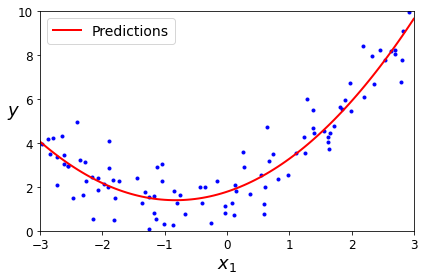

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

Hay que reflexionar un momento sobre lo que hemos visto. El uso de [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) hace que podamos ampliar las combinaciones de atributos en cualqueir conjunto de características. Como hemos visto el ejemplo con grado 2 al conjunto de carcterísticas original $[x]$ lo hemos transformado en $[x, x^2]$. Pero si usamos un grado superior como 3, un posible conjunto de características $[a,b]$ no solo se transforma en $[a,b,a^2, b^2, a^3, B^3]$ Si no que incluye también $[ab, a^2b, ab^2]$.

De manera general un grado $d$ con $n$ características se tranforma en un vector con $\frac{(n+d)!}{d!n!}$ hay que tener cuidado con el número de características que podemos generar por este métod.

# Curvas de aprendizaje

De manera generalizada una regresión polinomial encajará mejor los resutados de entrenamiento que una plano. Pero cuidado con el sobreajuste (*overfitting*) cuando usamos grados altos

Saving figure high_degree_polynomials_plot


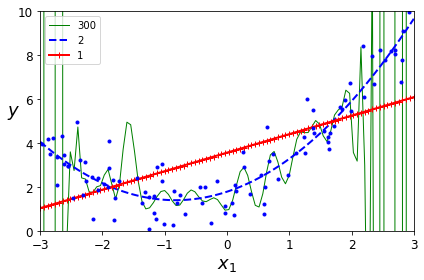

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

Fijémonos que el polinomio de grado 300 se pasa ajustando sus valores a los de entrenamiento, mientras que el de grado 1 se pasa por debajo y el grado 2 es que mejor se adapta a los valores.

Lógicamente ahora surge la pregunta ¿Cómo evito quedarme corto o pasarme (*underfitting or overfitting*) con mi modelo? Una parte de esa respuesta la dan las curvas de aprendizaje.


Las curvas de aprendizaje intentan mostrar gráficamente el desempeño del modelo en el conjunto de entrenamiento y en el de validación, dependiendo del tamaño de conjunto de entrenamiento.

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


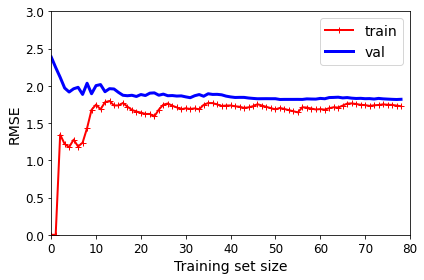

In [25]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

Vamos a interpretar brevement la curva que hemos obtenido. Por un lado vemos que cuando entrenamos con un conjunto muy pequeño el error que cometemos es pequeño también y el de validación grande Conforme esos valores aumentan ambos errores se aproximan.

Dado que el tamaño de X es 100 y que la función sudivide en conjuntos de entrenamiento y validación de 80% y 20%. El tamaño máximo de un subconjunto de entrenamiento es 80, tal y como vemos en el gráfico.

La función plot_learning_curves entrena 80 modelos (del 1 al 80) con los 80 posibles tamaños de entrenamiento (1 al 80) Y calcula el error medio (RMSE) en los conjuntos de entrenamiento y validación para cada modelo entrenado.

En realidad lo que vemos en el gráfico es que de manera muy rápida la diferencia de errores se estabiliza y aunque entremos con más datos la situación no mejora. Estamos en un caso de underfitting y posiblemente habría que cambiar de modelo.

Saving figure learning_curves_plot


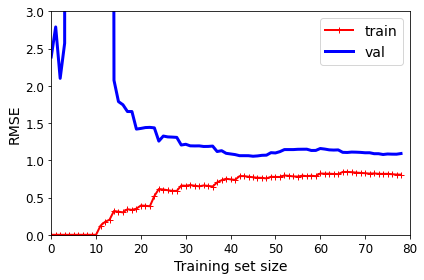

In [26]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

Este es un caso de Overfitting. Aunque el error es menor, el problema es que hemos trabajo con grados 10. El error de entrenamiento y validación aunque son menores están permanentemente separados y el entrenamiento es significativamente menor que el de validación.

La manera de evitar un error de overffiting es incrementar el numero de elmentos en el conjunto de entrenamiento.

# Modelos lineales regularizados

La mejor manera de evitar el overfitting de un modelo es regularizarlo, que en este contexto significa limitarlo. 

Si el modelo es de regresión polinómica la normalización se realiza disminuyendo el grado de los polinomios.

Si es una regresión lineal la manera de normalizar es limitado los pesos, para lo que podemos usar diferentes estrategias

## Regresión de la cresta (*Ridge regression*)

En este caso se trata de evitar que los pesos de los coeficientes calculados no sean muy grandes, haciendo que penalice ese tamaño en la función de coste. Que pasa a ser:

$J(\theta) = MSE(\theta) + \alpha \frac{1}{2}\sum_{i=1}^n \theta_i^2$

Es importante escalar los valores con [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) antes de hacer uso de este tipo de métodos.

In [27]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [28]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

Saving figure ridge_regression_plot


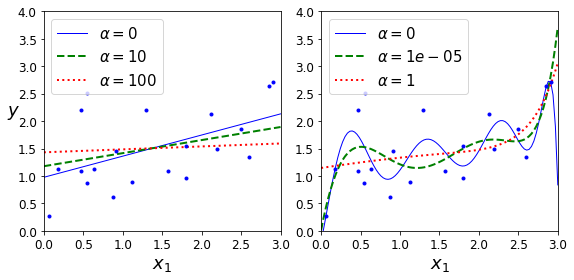

In [29]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

Se muestra en las imágenes un modelo lineal plano y otro polinómico con diferentes factores $\alpha$ de ridge regression

In [30]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## Regresión Lasso

Es muy parecido al caso anterior, pero en lugar de usar el cuadrado de los coeficientes en la penalización se usa el valor absoluto de los mismos.

$J(\theta) = MSE(\theta) + \alpha \frac{1}{2}\sum_{i=1}^n |\theta_i|$

C:\Users\Rafa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8028677038274434, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


Saving figure lasso_regression_plot


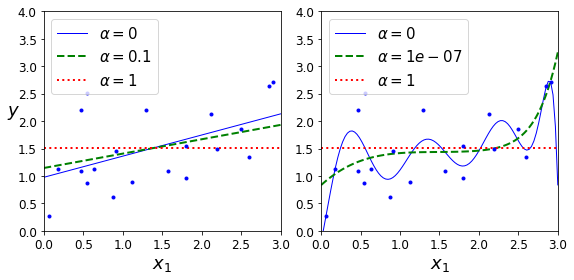

In [31]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

El uso de Lasso tiende a eliminar los coeficientes de las características menos significativas haciéndolos cero.

## Red elástica

Aquí tenemos un caso intermedio entre Lasso y Ridge, la función de coste incluye una penalización un poco más compleja.

$J(\theta) = MSE(\theta) + r\alpha \frac{1}{2}\sum_{i=1}^n |\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^n \theta_i^2 $

Si $r=1$ tenemos una regresión Lasso y si $r=0$ tenemos una regresión Ridge

In [32]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Detención temprana.

Aquí se trate de parar el entrenamiento cuando hemos llegado a un mínimo en el error.

In [33]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [34]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

Saving figure early_stopping_plot


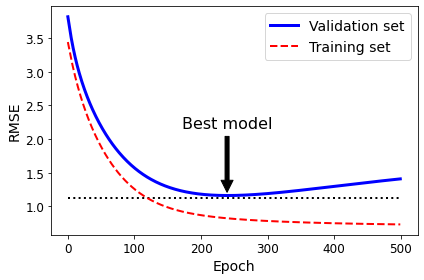

In [35]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()